In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helplers.he_bz_pes_plot import set_pub_style, plot_curves_on_axis

DATA_DIR = f"../data/HeBz"

In [2]:
sapt_results = np.load(f'{DATA_DIR}/sapt_results_qz_50.npy', allow_pickle=True).item()

In [3]:
distances = [float(entry['Distance']) for entry in sapt_results['QZ']]

In [4]:
to_cm_1 = 219.47463

electrostatics_all = []
exchange_all = []
induction_all = []
dispersion_all = []
hf_all = []
total_all = []


for sapt in sapt_results['QZ']:
    
    electrostatics = sapt['Electrostatics'] * to_cm_1
    exchange = sapt['Exchange'] * to_cm_1
    induction = sapt['Induction'] * to_cm_1
    dispersion = sapt['Dispersion'] * to_cm_1
    hf = sapt['HF'] * to_cm_1
    total = sapt['Total'] * to_cm_1

    electrostatics_all.append(electrostatics)
    exchange_all.append(exchange)
    induction_all.append(induction)
    dispersion_all.append(dispersion)
    hf_all.append(hf)
    total_all.append(total)

In [5]:
sorted_indices = np.argsort(distances)


distances_sorted = np.array(distances)[sorted_indices]
electrostatics_sorted = np.array(electrostatics_all)[sorted_indices]
exchange_sorted = np.array(exchange_all)[sorted_indices]
induction_sorted = np.array(induction_all)[sorted_indices]
dispersion_sorted = np.array(dispersion_all)[sorted_indices]
hf_sorted = np.array(hf_all)[sorted_indices]
total_sorted = np.array(total_all)[sorted_indices]

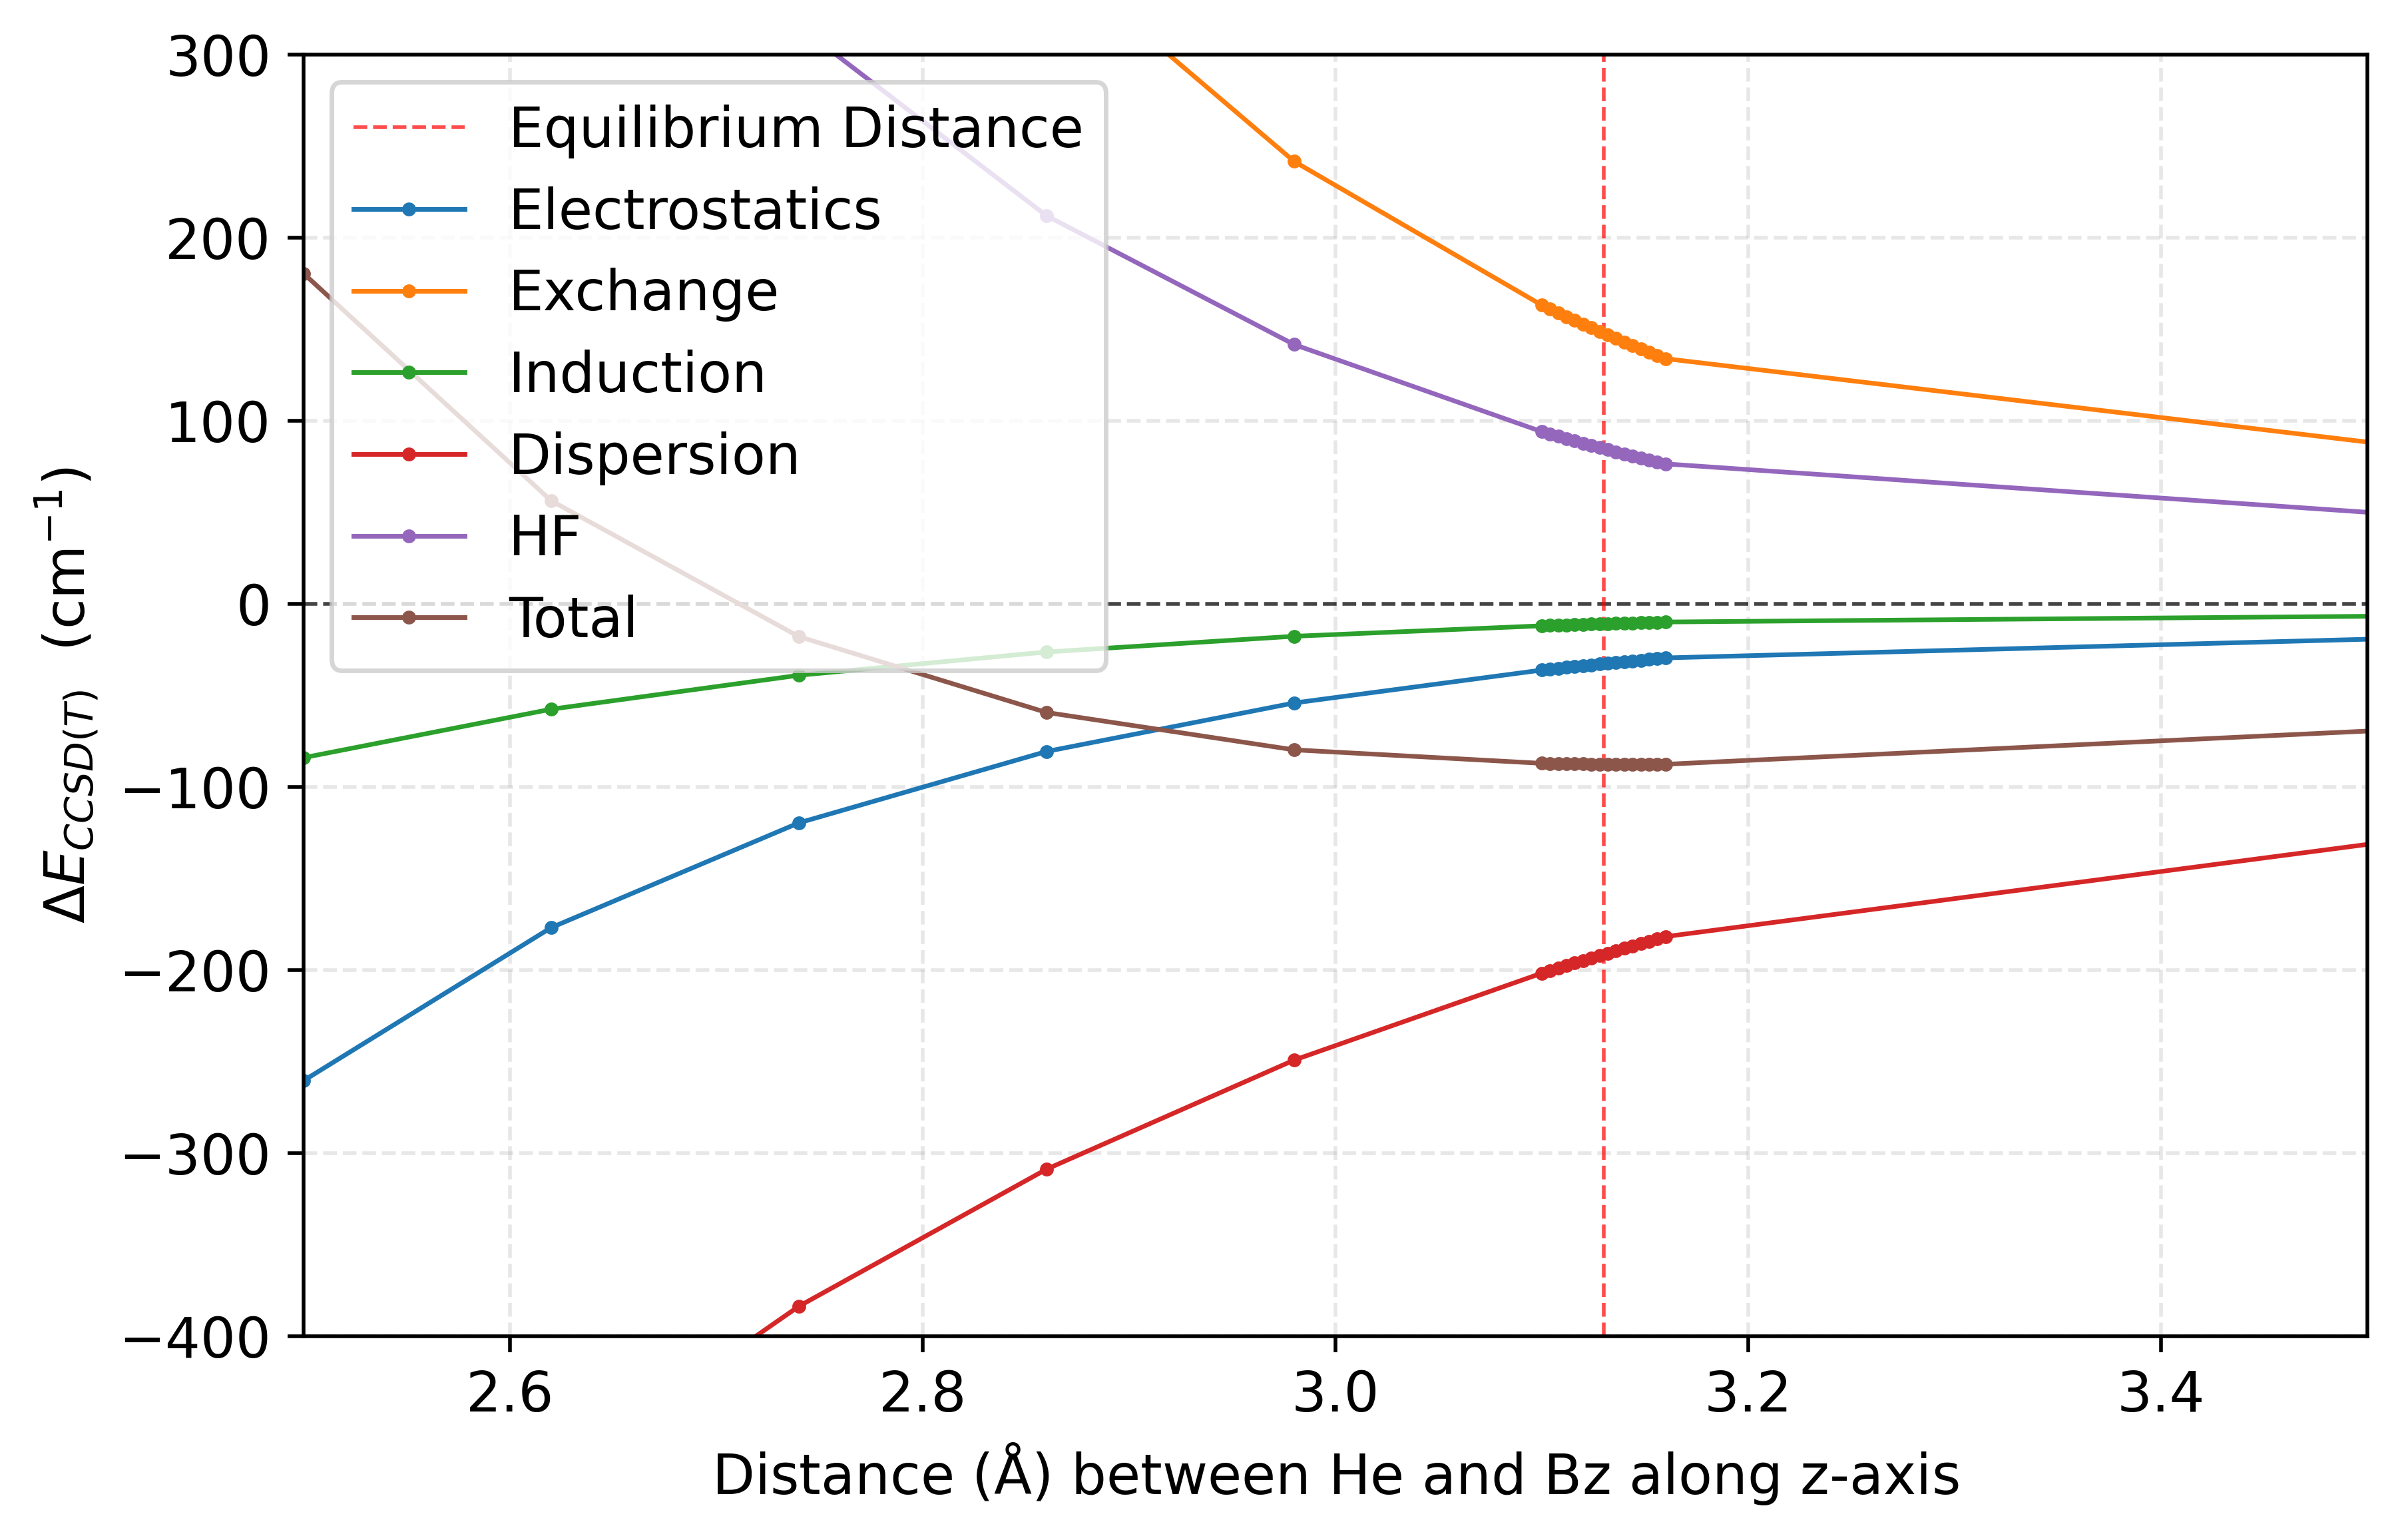

In [6]:
LINE_WIDTH = 1.25


basis_set_curves = [
    {
        "y_data": electrostatics_sorted,
        "label": "Electrostatics",
        "linewidth": LINE_WIDTH,
    },
    {
        "y_data": exchange_sorted,
        "label": "Exchange",
        "linewidth": LINE_WIDTH,
    },
    {
        "y_data": induction_sorted,
        "label": "Induction",
        "linewidth": LINE_WIDTH,
    },
    {
        "y_data": dispersion_sorted,
        "label": "Dispersion",
        "linewidth": LINE_WIDTH,
    },
    {
        "y_data": hf_sorted,
        "label": "HF",
        "linewidth": LINE_WIDTH,
    },
    {
        "y_data": total_sorted,
        "label": "Total",
        "linewidth": LINE_WIDTH,
    },

]


set_pub_style()

_, ax = plt.subplots(figsize=(8, 5), dpi=500)

ax.set_xlim(2.5, 3.5)
ax.set_ylim(-400, 300)
ax.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)
ax.axvline(3.13, color='red', linestyle='--', linewidth=0.8, alpha=0.7, label='Equilibrium Distance')

plot_curves_on_axis(
    ax,
    distances_sorted,
    basis_set_curves,
    r"Distance ($\mathrm{\AA}$) between He and Bz along z-axis",
    r"$\Delta E_{CCSD(T)}$" + f"  (cm$^{{-1}}$)",
    legend_loc="upper left",
)

plt.show()